# 다중 출력 회귀

- 타겟변수 y가 하나의 값을 갖는 것이 아니라 다수의 값을 갖는 경우
- 회귀와 분류
 - (회귀)출력이 벡터 형태로 다수의 아나로그 값을 갖는 경우
 - (분류)출력이 남여 구분이 아니라 국적 구분도 해야 하는 경우(multi-class output)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
from numpy.random import rand, randn

## 데이터 생성
- 시스템의 입력과 출력 데이터 생성 함수

In [3]:
def get_random_x(n_steps=30):
    a = 0.5 + rand() # 0.5 ~ 1.5 사이의 임의의 레벨 선택
    xs = np.linspace(0,6,n_steps)
    ys = -0.1*a*xs*(xs -6) # y = -a*x(x-6) 거리가 6 나가는 포물선
    return ys

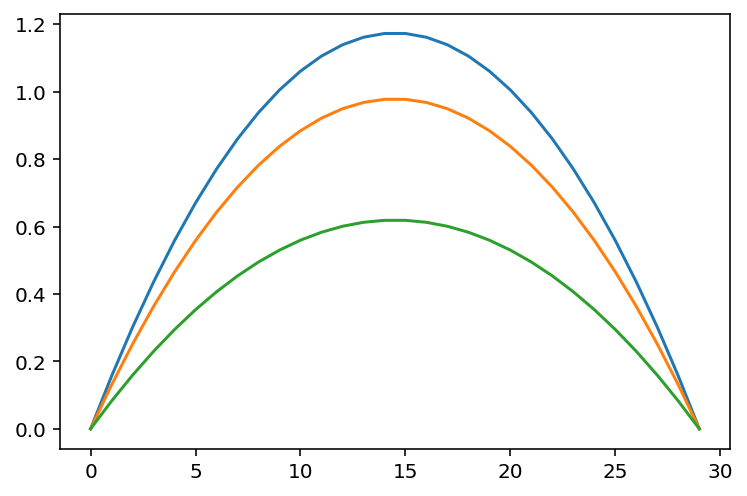

In [12]:
# 랜덤한 입력 신호 생성
plt.plot(get_random_x())
plt.plot(get_random_x())
plt.plot(get_random_x())

In [13]:
get_random_x()

array([ 0.        ,  0.13643742,  0.26312931,  0.38007567,  0.4872765 ,
        0.5847318 ,  0.67244157,  0.75040581,  0.81862452,  0.8770977 ,
        0.92582535,  0.96480747,  0.99404406,  1.01353512,  1.02328065,
        1.02328065,  1.01353512,  0.99404406,  0.96480747,  0.92582535,
        0.8770977 ,  0.81862452,  0.75040581,  0.67244157,  0.5847318 ,
        0.4872765 ,  0.38007567,  0.26312931,  0.13643742, -0.        ])

In [14]:
# 임의의 출력을 얻는 함수 (4개를 얻는다고 가정) 
def get_4_y(x):
    y1 = x.sum() + 1.8*randn()
    y2 = (x**2).sum() + 1.8*randn()
    y3 = (x**3).sum() + 1.8*randn()
    y4 = (x**4).sum() + 1.8*randn()
    return y1, y2, y3, y4

In [15]:
sample = get_random_x()
print('X=', sample)
print('y=',get_4_y(sample))

X= [ 0.          0.09670137  0.1864955   0.26938238  0.34536203  0.41443444
  0.4765996   0.53185753  0.58020821  0.62165165  0.65618786  0.68381682
  0.70453854  0.71835302  0.72526026  0.72526026  0.71835302  0.70453854
  0.68381682  0.65618786  0.62165165  0.58020821  0.53185753  0.4765996
  0.41443444  0.34536203  0.26938238  0.1864955   0.09670137 -0.        ]
y= (16.24535084575144, 7.978811864492319, 5.674029546079521, 3.6334203926938535)


In [16]:
# 샘플 데이터 X, y 생성
N = 200
samples = []
multi_y = []
for i in range(N):
    x = get_random_x()
    samples.append(x)
    multi_y.append(get_4_y(x))
X = np.array(samples)
y = np.array(multi_y)

In [18]:
X.shape, y.shape

((200, 30), (200, 4))

In [19]:
X[:3], y[:3]

(array([[ 0.        ,  0.07442553,  0.14353496,  0.20732827,  0.26580547,
          0.31896657,  0.36681155,  0.40934043,  0.4465532 ,  0.47844985,
          0.5050304 ,  0.52629484,  0.54224317,  0.55287538,  0.55819149,
          0.55819149,  0.55287538,  0.54224317,  0.52629484,  0.5050304 ,
          0.47844985,  0.4465532 ,  0.40934043,  0.36681155,  0.31896657,
          0.26580547,  0.20732827,  0.14353496,  0.07442553, -0.        ],
        [ 0.        ,  0.0630978 ,  0.12168861,  0.17577244,  0.22534928,
          0.27041914,  0.31098201,  0.3470379 ,  0.3785868 ,  0.40562871,
          0.42816364,  0.44619158,  0.45971254,  0.46872651,  0.47323349,
          0.47323349,  0.46872651,  0.45971254,  0.44619158,  0.42816364,
          0.40562871,  0.3785868 ,  0.3470379 ,  0.31098201,  0.27041914,
          0.22534928,  0.17577244,  0.12168861,  0.0630978 , -0.        ],
        [ 0.        ,  0.13006064,  0.25083123,  0.36231178,  0.46450229,
          0.55740274,  0.64101315,  

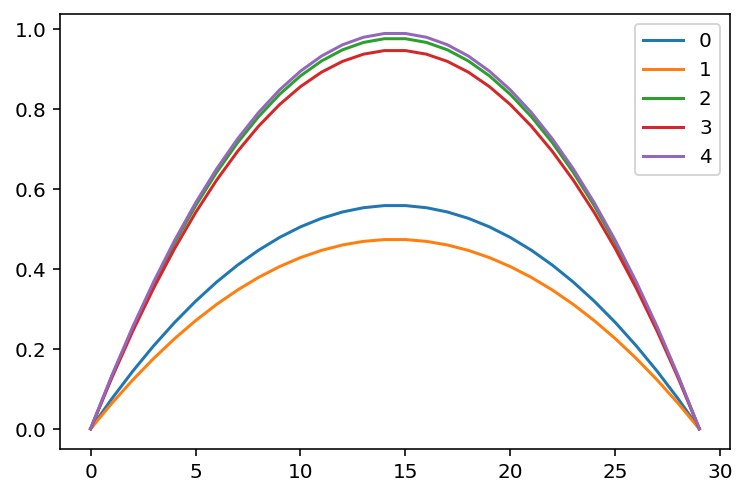

In [20]:
for i in range(5):
    plt.plot(X[i], label=str(i))
    plt.legend()

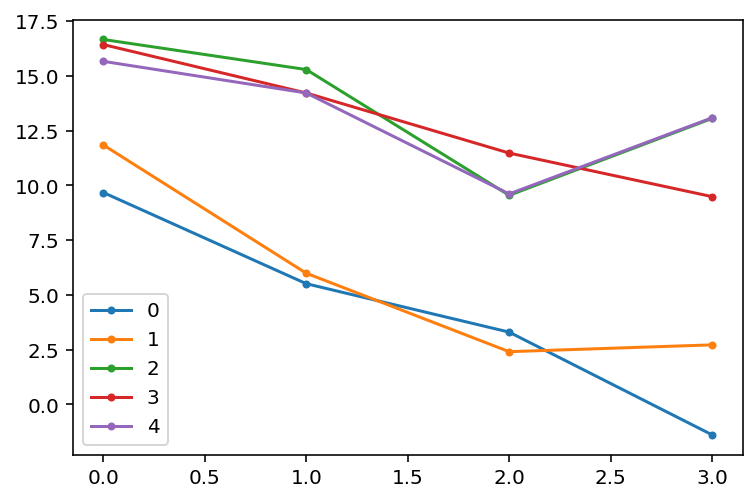

In [21]:
for i in range(5):
    plt.plot(y[i], label=str(i), marker='.')
    plt.legend()

### 모든 입력 데이터를 사용한 다중회귀 예측

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=9)

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
rfr = RandomForestRegressor(n_estimators=20)
rfr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=20)

## 컬럼별로 r2 구하기
- 목적 변수에 4개의 컬럼(y1, y2, y3, y4) 이 있다
- 각 컬럼별로 r2 구하기

In [ ]:
# 멀티아웃풋을 랜덤포레스트를 사용하면 한번에 얻는다 (kNN, MLP 등 신경망)

In [24]:
X_train.shape

(150, 30)

In [27]:
y_pred = rfr.predict(X_test)
r2_score(y_test, y_pred, multioutput="raw_values") # 주의!

array([0.74930721, 0.91958108, 0.89015015, 0.9551003 ])

In [16]:
# 과제: 노이지가 많아서 y를 생성할 때 노이지 레벨을 0.1, 0.2, 0.3 로 바꾸어본다.
# 실제값과 예측치를 비교해서 그려보시오(plot) (y_test, y_pred 비교): 4세트가 있다!

In [28]:
y_pred.shape

(50, 4)

In [29]:
y_test.shape

(50, 4)

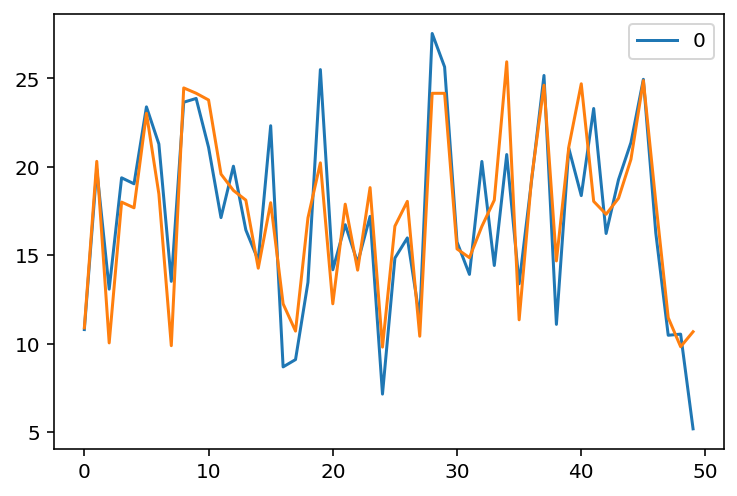

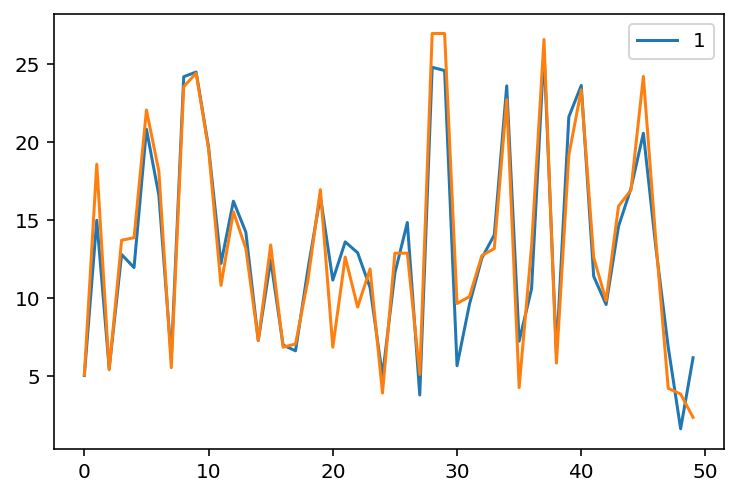

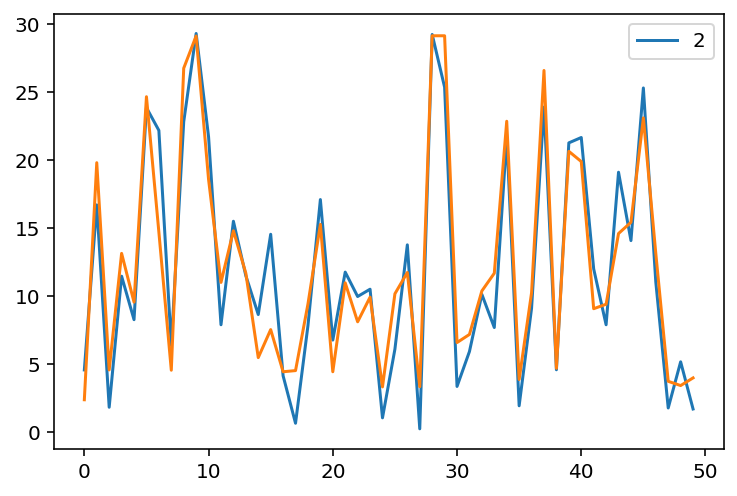

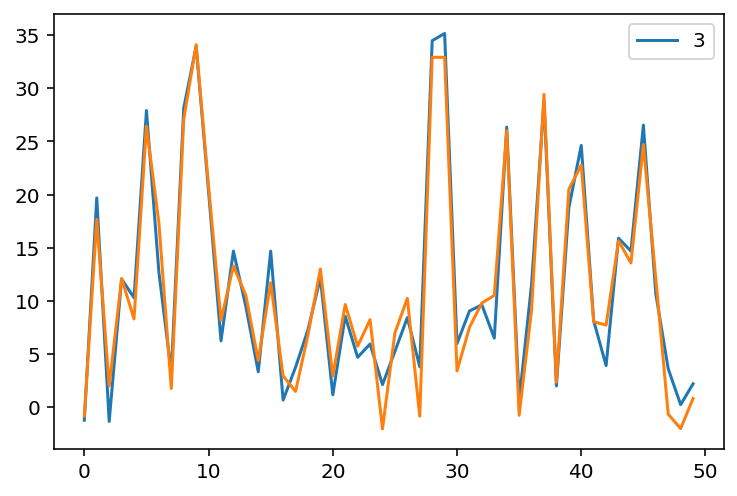

In [32]:
for i in range(4):
    plt.plot(y_test[:,i], label=str(i))
    plt.plot(y_pred[:,i])
    plt.legend()
    plt.show()


In [113]:
r2_score(y_test, y_pred, multioutput="raw_values")

array([0.81179473, 0.91040412, 0.95140719, 0.95863745])

In [114]:
# 컬럼별 r2의 평균을 보여준다
r2_score(y_test, y_pred)

0.9080608738705497

## 행별로 R2 구하기
- 샘플별, 시계열 데이터를 대상으로 r2 구하기

In [143]:
y_test.shape

(50, 30)

In [20]:
r2_score(y_test.T, y_pred.T, multioutput="raw_values")

array([0.93213799, 0.99342162, 0.98797543, 0.97017717, 0.98544333,
       0.99861438, 0.99256305, 0.97247753, 0.99745142, 0.87537213,
       0.99284245, 0.98428718, 0.99350578, 0.98209927, 0.9867977 ,
       0.99848335, 0.98551282, 0.95481444, 0.99650218, 0.98203426,
       0.99733483, 0.95916199, 0.99114373, 0.99355559, 0.99266283,
       0.97053958, 0.974061  , 0.99713406, 0.98965142, 0.96579832,
       0.97796523, 0.99236392, 0.95178714, 0.9901766 , 0.97325195,
       0.91399148, 0.99265635, 0.99153129, 0.99619794, 0.98666911,
       0.96290714, 0.99005842, 0.99379719, 0.98898062, 0.97424672,
       0.95439824, 0.94391375, 0.99717635, 0.9955125 , 0.97494428])

In [145]:
# 트릭
r2_score(y_test.T, y_pred.T, multioutput="raw_values").mean()

0.975049719556423

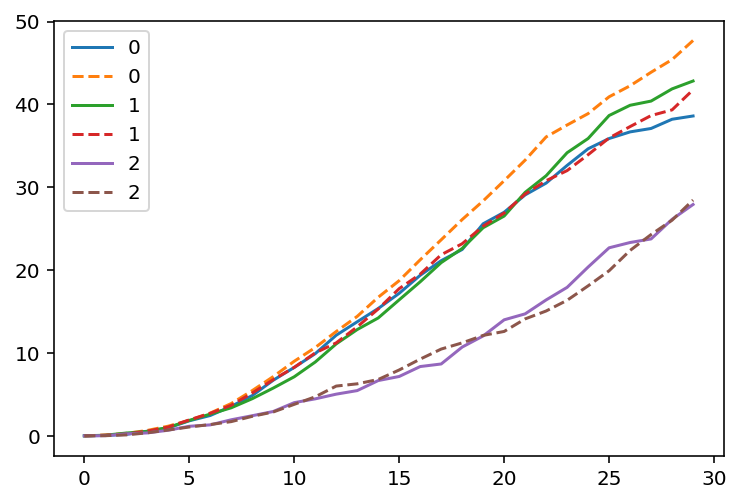

In [23]:
# 실제값과 예측치 (행 단위)
for i in range(0,3):
    plt.plot(y_test[i], label=str(i))
    plt.plot(y_pred[i], '--', label=str(i))
    plt.legend()

### 입력으로 30개가 아닌 일부 샘플만 사용하는 경우

In [24]:
X.shape

(200, 30)

In [25]:
# 일부 샘플 5개만 사용하는 경우
# n_interval = 5
# xn = np.int(n_steps/n_interval)
# x_sample = [xn*(i+1)-1 for i in range(n_interval)]

# 5개 위치 샘플만 입력(X)으로 사용

x_sample = [5, 11, 17, 23, 29]
X_part = X[:,x_sample]

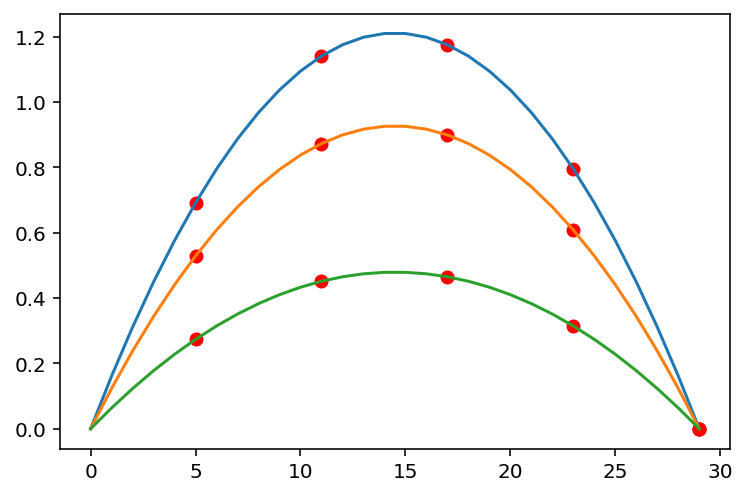

In [149]:
for i in range(3):
    plt.plot(X[i])
    plt.scatter(x_sample, X_part[i], c='r')

### 성능 비교

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_part, y, random_state=9)
X_train.shape, y_train.shape

((150, 5), (150, 30))

In [27]:
rfr = RandomForestRegressor(n_estimators=20)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

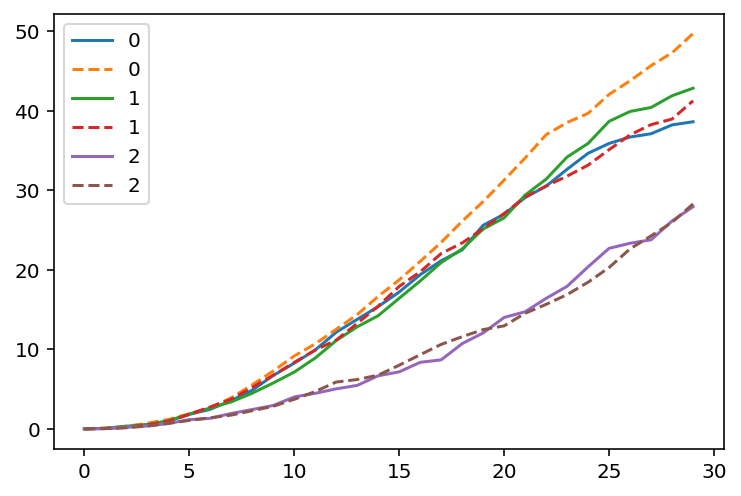

In [28]:
for i in range(3):
    plt.plot(y_test[i], label=str(i))
    plt.plot(y_pred[i], '--', label=str(i))
    plt.legend()

In [29]:
r2_score(y_test.T, y_pred.T, multioutput="raw_values").mean()

0.9763937170869648

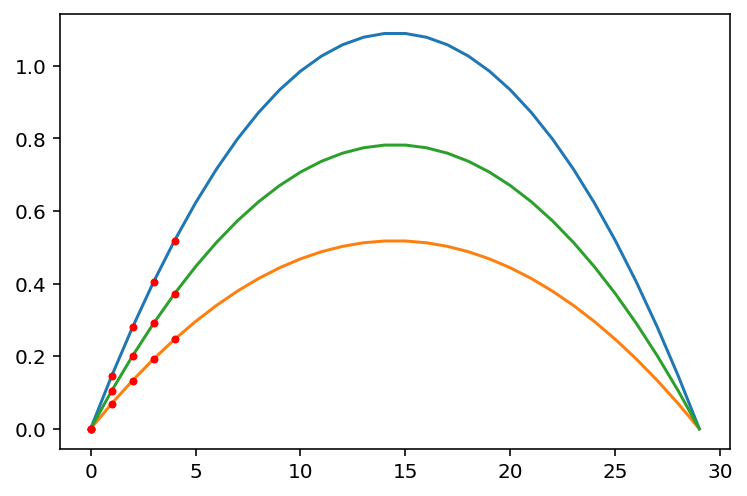

In [31]:
# 다른 예제: 앞 부분의 일부(5개) 샘플만 사용하는 경우
X_part = X[:,:5]
for i in range(3):    
    plt.plot(X[i])
    plt.plot(X_part[i], 'r.')

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_part, y, random_state=9)
rfr = RandomForestRegressor(n_estimators=20)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
r2_score(y_test.T, y_pred.T, multioutput="raw_values").mean()

0.9789044235116665

In [156]:
X_test.shape, y_test.shape

((50, 3), (50, 30))

# 다중 분류
- RandomForestClassifer() 사용
- multi-class output 모델
- y로 단일 값이 아니라 아래와 같이 다중 값을 사용
 - multi_y = np.c_[y1, y2] 또는
 - multi_y = np.stack((y1,y2)).T 사용